# **SDG 7 - Energy access Prediction and Analysis**

## Objectives

* Analyse global trends in access to sustainable nergy.

## Inputs

* Dataset: Global-Data-On-Sustainable-Energy
* Colums: Country, year, access_to electricity etc

## Outputs

* Visualizations of trends and forecasts
* Exported CSV for dashboards or reports

## Additional Comments

* This notebook forms part of the final project for the Data Analytics Course



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [23]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\FINALPROYECTCODE\\SDG7_Proyect'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [24]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [25]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\FINALPROYECTCODE'

**Import Libraries**

In [26]:
import pandas as pd  #for data manipulation
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for statistical data visualization
import plotly.express as px #for interactive plotting


**Load Dataset and test it**

In [27]:
raw_path = "Data\Raw\global-data-on-sustainable-energy.csv"
df = pd.read_csv(raw_path, encoding='latin1')
df.head()

<>:1: SyntaxWarning:

invalid escape sequence '\R'

<>:1: SyntaxWarning:

invalid escape sequence '\R'

C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1918513345.py:1: SyntaxWarning:

invalid escape sequence '\R'

C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1918513345.py:1: SyntaxWarning:

invalid escape sequence '\R'



FileNotFoundError: [Errno 2] No such file or directory: 'Data\\Raw\\global-data-on-sustainable-energy.csv'

### ***ETL***

This section performs data cleaning and preparation for further modeling. Steps include renaming colums,
handling missing values and exporting a clean dataset.

**Rename the colums for easier access**

In [ ]:
df.rename(columns={
    'Entity': 'country',
    'Access to electricity (% of population)': 'access_to_electricity',
    'Access to clean fuels for cooking': 'access_to_clean_fuels',
    'Renewable-electricity-generating-capacity-per-capita': 'renewable_capacity_per_capita',
    'Financial flows to developing countries (US $)': 'financial_flows',
    'Renewable energy share in the total final energy consumption (%)': 'renewable_energy_share',
    'Electricity from fossil fuels (TWh)': 'fossil_electricity',
    'Electricity from nuclear (TWh)': 'nuclear_electricity',
    'Electricity from renewables (TWh)': 'renewable_electricity',
    'Low-carbon electricity (% electricity)': 'low_carbon_electricity_pct',
    'Primary energy consumption per capita (kWh/person)': 'primary_energy_per_capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'energy_intensity',
    'Value_co2_emissions_kt_by_country': 'co2_emissions_kt',
    'density\\np/km2': 'density'
}, inplace=True)
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace('\n', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.rename(columns={
    'density\\np/km2': 'density'
}, inplace=True)
df.head()

,country,year,access_to_electricity,access_to_clean_fuels,renewable_capacity_per_capita,financial_flows,renewable_energy_share,fossil_electricity,nuclear_electricity,renewable_electricity,...,primary_energy_per_capita,energy_intensity,co2_emissions_kt,renewables_%_equivalent_primary_energy,gdp_growth,gdp_per_capita,density,land_areakm2,latitude,longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


**Check types**

In [ ]:
df.dtypes

country                                    object
year                                        int64
access_to_electricity                     float64
access_to_clean_fuels                     float64
renewable_capacity_per_capita             float64
financial_flows                           float64
renewable_energy_share                    float64
fossil_electricity                        float64
nuclear_electricity                       float64
renewable_electricity                     float64
low_carbon_electricity_pct                float64
primary_energy_per_capita                 float64
energy_intensity                          float64
co2_emissions_kt                          float64
renewables_%_equivalent_primary_energy    float64
gdp_growth                                float64
gdp_per_capita                            float64
density                                    object
land_areakm2                              float64
latitude                                  float64


**Check Null values**

In [ ]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


access_to_electricity                       10
access_to_clean_fuels                      169
renewable_capacity_per_capita              931
financial_flows                           2089
renewable_energy_share                     194
fossil_electricity                          21
nuclear_electricity                        126
renewable_electricity                       21
low_carbon_electricity_pct                  42
energy_intensity                           207
co2_emissions_kt                           428
renewables_%_equivalent_primary_energy    2137
gdp_growth                                 317
gdp_per_capita                             282
density                                      1
land_areakm2                                 1
latitude                                     1
longitude                                    1
dtype: int64


**Eliminate columns with too many null values and redundant data**

In [ ]:
columns_to_drop = ['density', 'land_areakm2', 'latitude', 'longitude', 'renewables_%_equivalent_primary_energy', 'financial_flows',
                   'electricity from nuclear (twh)']
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped columns:", columns_to_drop)

Dropped columns: ['density', 'land_areakm2', 'latitude', 'longitude', 'renewables_%_equivalent_primary_energy', 'financial_flows']


In [ ]:
null_columns = df.isnull().sum()
print(null_columns)

country                            0
year                               0
access_to_electricity             10
access_to_clean_fuels            169
renewable_capacity_per_capita    931
renewable_energy_share           194
fossil_electricity                21
nuclear_electricity              126
renewable_electricity             21
low_carbon_electricity_pct        42
primary_energy_per_capita          0
energy_intensity                 207
co2_emissions_kt                 428
gdp_growth                       317
gdp_per_capita                   282
dtype: int64


**Use interpolate to fill the null values**

In [ ]:
df.interpolate(method='linear', inplace=True)
df = df.sort_values(by=['country', 'year'])
df = df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
null_columns = df.isnull().sum()
print(null_columns)

C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1778600730.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1778600730.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1778600730.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('country').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
C:\Users\organ\AppData\

country                          0
year                             0
access_to_electricity            0
access_to_clean_fuels            0
renewable_capacity_per_capita    0
renewable_energy_share           0
fossil_electricity               0
nuclear_electricity              0
renewable_electricity            0
low_carbon_electricity_pct       0
primary_energy_per_capita        0
energy_intensity                 0
co2_emissions_kt                 0
gdp_growth                       0
gdp_per_capita                   0
dtype: int64


**Save the dataset as a clean csv**

In [ ]:
processed_path = "Data/Processed/global-data-on-sustainable-energy-processed.csv"
df.to_csv(processed_path, index=False)
print("Processed data saved to:", processed_path)

Processed data saved to: Data/Processed/global-data-on-sustainable-energy-processed.csv


In [ ]:
processed_df = pd.read_csv(processed_path)
print("Processed data loaded successfully.")
processed_df.head()

Processed data loaded successfully.


,country,year,access_to_electricity,access_to_clean_fuels,renewable_capacity_per_capita,renewable_energy_share,fossil_electricity,nuclear_electricity,renewable_electricity,low_carbon_electricity_pct,primary_energy_per_capita,energy_intensity,co2_emissions_kt,gdp_growth,gdp_per_capita
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,8.832278,179.426579
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,8.832278,179.426579
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,8.832278,179.426579
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074


### EDA

Exploratory Data Analysis
We explore trends, outliers and potential correlations across the dataset.

I aim to:
- Understand global trends in electricity access and energy development.
- Identify countries with the lowest access.
- Evaluate how indicators correlate (GDP per capita, clean fuels etc)
- Build the foundation for hypothesis testing and modeling.

Visual check

In [ ]:
processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        3649 non-null   object 
 1   year                           3649 non-null   int64  
 2   access_to_electricity          3649 non-null   float64
 3   access_to_clean_fuels          3649 non-null   float64
 4   renewable_capacity_per_capita  3649 non-null   float64
 5   renewable_energy_share         3649 non-null   float64
 6   fossil_electricity             3649 non-null   float64
 7   nuclear_electricity            3649 non-null   float64
 8   renewable_electricity          3649 non-null   float64
 9   low_carbon_electricity_pct     3649 non-null   float64
 10  primary_energy_per_capita      3649 non-null   float64
 11  energy_intensity               3649 non-null   float64
 12  co2_emissions_kt               3649 non-null   f

Basic statistics

In [ ]:
processed_df.describe().T
df = processed_df.copy() # Creating a copy of the processed DataFrame for further analysis

### 1. Global Trend in Access to Electricity

This plot shows the average global access to electricity from 2000 to 2020. The trend is upward, which reflects the overall global effort toward achieving SDG 7 targets.


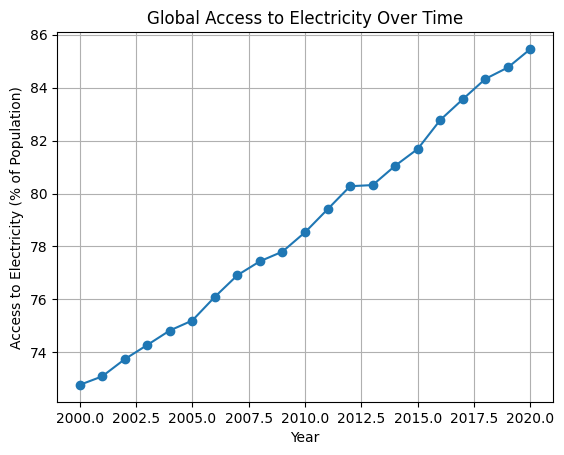

In [ ]:
global_access = processed_df.groupby('year')['access_to_electricity'].mean().reset_index()

plt.plot(global_access['year'], global_access['access_to_electricity'], marker='o')
plt.title('Global Access to Electricity Over Time')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (% of Population)')
plt.grid()
plt.show()

We can observe a steady global improvement, from approximately 73% in 2000 to over 85% by 2020. However, this global average may hide severe disparities among regions and countries.


### 2. Countries with the Lowest Electricity Access in 2020

This horizontal bar chart displays the bottom 10 countries in terms of electricity access percentage. All values are below 30%, highlighting critical energy poverty.


C:\Users\organ\AppData\Local\Temp\ipykernel_18720\3216834047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_countries, x='access_to_electricity', y='country', palette='viridis')


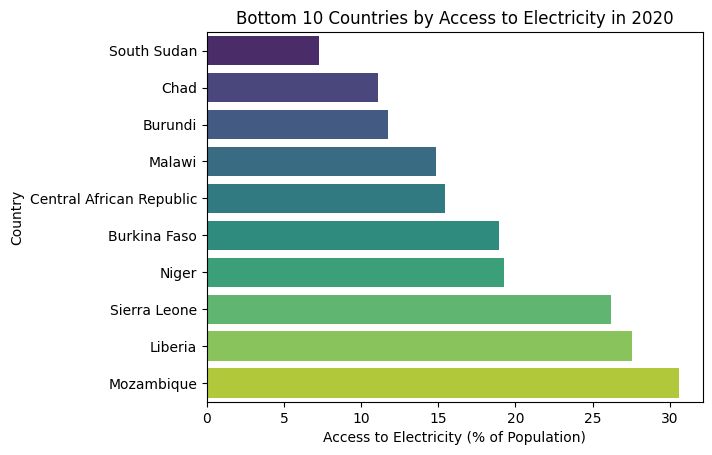

In [ ]:
latest_year = processed_df['year'].max()
bottom_10_countries = processed_df[processed_df['year'] == latest_year].nsmallest(10, 'access_to_electricity')

sns.barplot(data=bottom_10_countries, x='access_to_electricity', y='country', palette='viridis')
plt.title(f'Bottom 10 Countries by Access to Electricity in {latest_year}')
plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('Country')
plt.show()

South Sudan, Chad, and Burundi have the lowest access rates, many below 10%. These countries are in Sub-Saharan Africa, where infrastructure and political instability are major limiting factors.


### 3. Correlation Between Key Energy and Development Indicators

This correlation matrix helps us understand the relationships between electricity access, clean fuels, renewables, energy intensity, emissions, and GDP per capita.

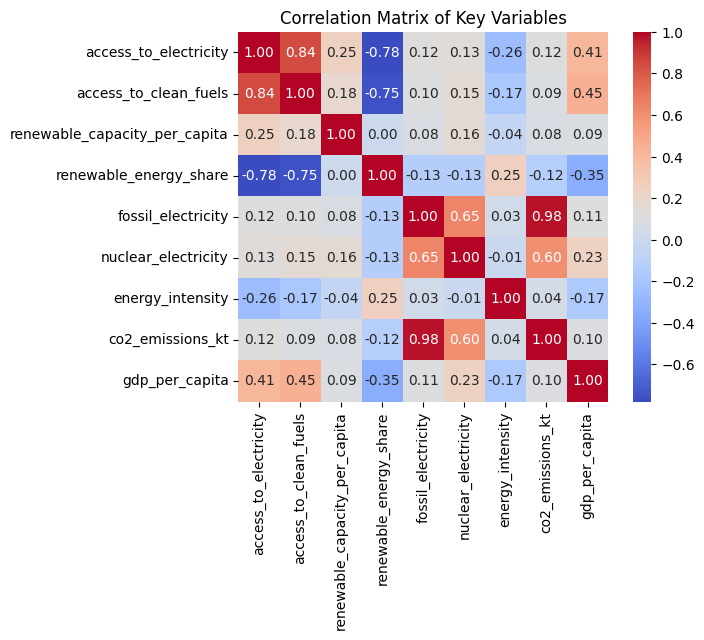

In [ ]:
correlation_cols = ['access_to_electricity', 'access_to_clean_fuels', 'renewable_capacity_per_capita',
                    'renewable_energy_share', 'fossil_electricity', 'nuclear_electricity',
                    'energy_intensity', 'co2_emissions_kt', 'gdp_per_capita']

correlation_matrix = processed_df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Key Variables')
plt.show()

There is a strong positive correlation between access to electricity and clean fuels (0.84), as expected. Interestingly, renewable energy share has a strong **negative correlation** with access indicators, which may suggest that countries with high renewables still struggle with universal access — potentially due to underdeveloped grids. GDP per capita shows a moderate positive correlation with electricity access (0.41).


---

### 4. Choropleth Map: Access to Electricity by Country (2020)

This interactive choropleth map displays global disparities in access to electricity. Each country is shaded according to the percentage of its population with access to electricity in the year 2020.

The map helps identify geographic patterns of energy inequality. Sub-Saharan Africa shows notably lower access levels, while most developed regions are above 95%.


In [31]:
# filter by year

for year in [2000, 2010, 2020]:
    df_year = processed_df[processed_df["year"] == year]
    fig = px.choropleth(
        df_year,
        locations="country",
        locationmode="country names",
        color="access_to_electricity",
        hover_name="country",
        color_continuous_scale="YlGnBu",
        title=f"Global Electricity Access – {year}",
        labels={'access_to_electricity': '% Electricity Access'}
    )
    fig.show()

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor='Black'),
    margin=dict(l=0, r=0, t=50, b=0),
    coloraxis_colorbar=dict(title='Access to Electricity (%)') )

The visualization confirms the critical need for investment in electricity infrastructure across many African countries. This spatial insight supports the focus of SDG 7 on closing energy access gaps globally. The countries that did not appear on the map are missing due to the absence of data.



### Hypothesis

### GDP per Capita vs Access to clean Energy

countries with lower GDP per capita tend to have lower access to clean energy
- Access to electriciy
- access to clean fuels for cooking

this will be analysed using scatter plots and correlation coefficients.


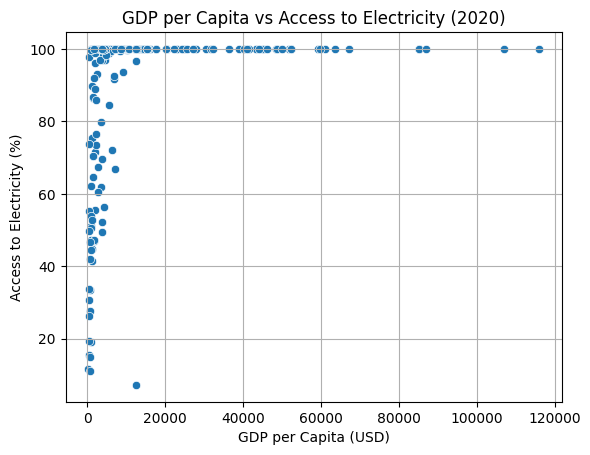

In [ ]:
# Filter by year
latest_year = processed_df['year'].max()


# Scatter plot: GDP per capita vs Access to Electricity
sns.scatterplot(
    data=df_year,
    x='gdp_per_capita',
    y='access_to_electricity'
)
plt.title('GDP per Capita vs Access to Electricity (2020)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Access to Electricity (%)')
plt.grid(True)
plt.show()

C:\Users\organ\AppData\Local\Temp\ipykernel_18720\290658529.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




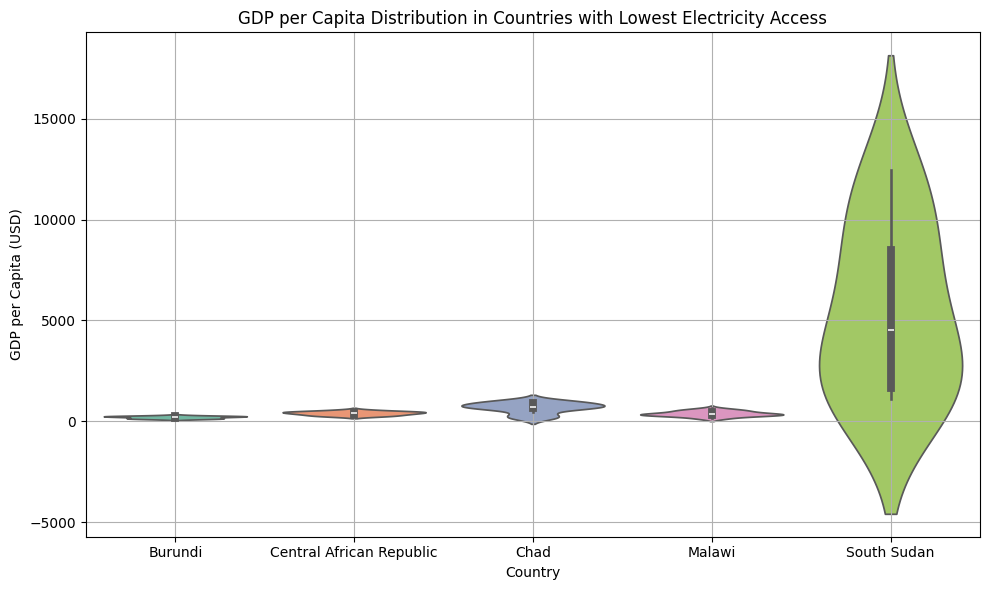

In [ ]:
# Filter by year
latest_year = processed_df['year'].max()

# 5 countries with lowest access to electricity
bottom5 = df_year.sort_values("access_to_electricity").head(5)["country"].unique()

# Filter the DataFrame for the bottom 5 countries
df_violin = processed_df[processed_df["country"].isin(bottom5)]

# Create a violin plot for GDP per capita in the bottom 5 countries
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_violin,
    x="country",
    y="gdp_per_capita",
    palette="Set2"
)

plt.title("GDP per Capita Distribution in Countries with Lowest Electricity Access")
plt.xlabel("Country")
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()




C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1770875444.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\organ\AppData\Local\Temp\ipykernel_18720\1770875444.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




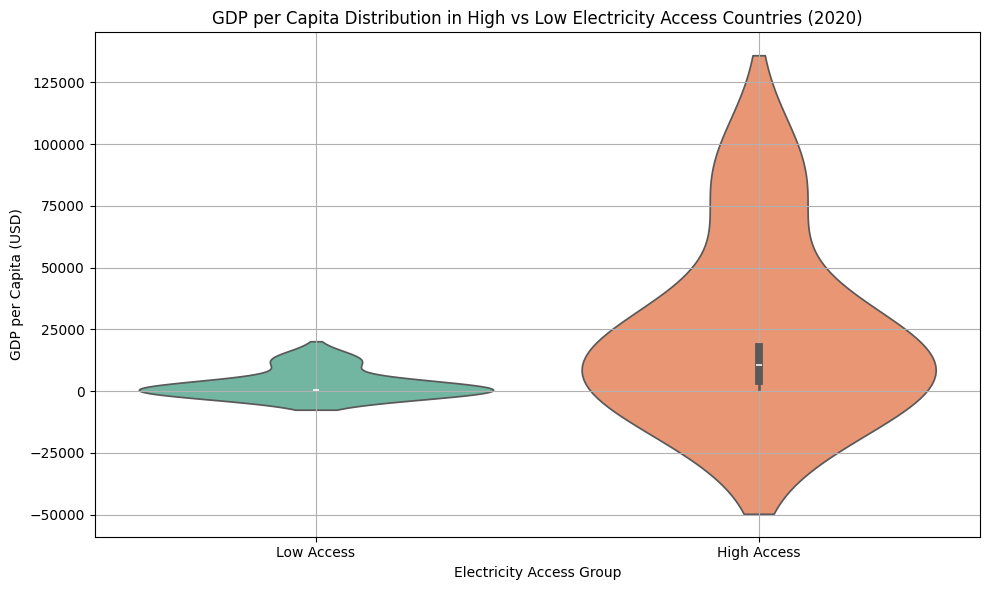

In [28]:
# select the countries with the highest and lowest access to electricity
bottom5 = df_year.sort_values("access_to_electricity").head(5)["country"].unique()
top5 = df_year.sort_values("access_to_electricity", ascending=False).head(5)["country"].unique()

# create a new column to categorize countries based on their access to electricity
df_year["access_group"] = df_year["country"].apply(
    lambda x: "High Access" if x in top5 else ("Low Access" if x in bottom5 else "Other")
)

# filter the DataFrame to include only the high and low access groups
df_violin = df_year[df_year["access_group"].isin(["High Access", "Low Access"])]

# create a violin plot for GDP per capita in high vs low electricity access countries
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_violin,
    x="access_group",
    y="gdp_per_capita",
    palette="Set2"
)
plt.title("GDP per Capita Distribution in High vs Low Electricity Access Countries (2020)")
plt.xlabel("Electricity Access Group")
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation of Violinplot: GDP per Capita in High vs Low Electricity Access Countries

This violinplot compares the distribution of GDP per capita in 2020 for countries with the **highest** and **lowest** electricity access.

- **High Access countries** show a wider and higher distribution, with most values above $10,000, suggesting stronger economies.
- **Low Access countries** are more concentrated below $2,000, indicating lower economic development.

This reinforces the idea that **economic capability supports infrastructure investment**, though as seen before, **exceptions exist**.

The **violinplot** was chosen because it:
- Shows the **full distribution** (unlike boxplots),
- Allows us to spot **outliers, skewness, and spread**,
- Is more informative than a simple barplot or mean comparison.


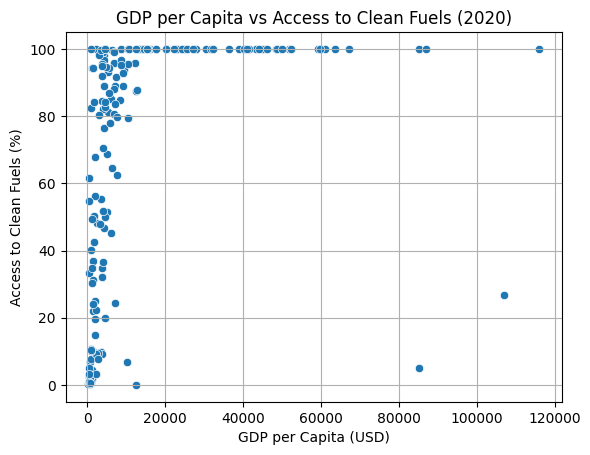

In [29]:
# scatter plot: gdp per capita vs access to clean fuels
sns.scatterplot(
    data=df_year,
    x='gdp_per_capita',
    y='access_to_clean_fuels'
)
plt.title('GDP per Capita vs Access to Clean Fuels (2020)')
plt.xlabel('GDP per Capita (USD)')  
plt.ylabel('Access to Clean Fuels (%)')
plt.grid(True)
plt.show()

In [ ]:
# correlation between gdp per capita and access to electricity
gdp_access_corr = df_year[['gdp_per_capita', 'access_to_electricity']].corr().iloc[0, 1]
fuels_access_corr = df_year[['gdp_per_capita', 'access_to_clean_fuels']].corr().iloc[0, 1]
print(f"Correlation between GDP per Capita and Access to Electricity: {gdp_access_corr:.2f}")
print(f"Correlation between GDP per Capita and Access to Clean Fuels: {fuels_access_corr:.2f}")

**Interpretation of Hypothesis 1:**

The data shows a **moderate positive correlation** between GDP per capita and access to electricity (**0.36**) and to clean fuels (**0.38**). This supports the hypothesis that economic development facilitates energy access.

However, exceptions exist. For example:
- **Vietnam** has a relatively low GDP per capita, but nearly **100% access to electricity and clean fuels**, showing effective energy policies despite modest income levels.
- Conversely, **Chad** or **South Sudan**, with similar income levels, show access below **10%**, highlighting the influence of governance, infrastructure, and conflict.

**Conclusion**: GDP per capita is a relevant factor but **not sufficient**. Other socioeconomic and political variables greatly impact energy access.

### Hypothesis 2: Renewable Growth vs Electricity Access Improvement

This analysis compares the percentage growth in renewable electricity capacity per capita and the growth in access to electricity between 2000 and 2020.

Note: Countries with 100% electricity access in the base year (2000) are going to be excluded from this analysis

A scatter plot and correlation are used to evaluate whether increasing renewable capacity leads to better electricity access.


In [ ]:
# select initial and final years
initial_year = 2000
final_year = 2020

df_start = processed_df[processed_df['year'] == initial_year]
df_end = processed_df[processed_df['year'] == final_year]

# Merge the two DataFrames on 'country'
df_merged = pd.merge(df_start[['country', 'access_to_electricity', 'renewable_capacity_per_capita']],
                     df_end[['country', 'access_to_electricity', 'renewable_capacity_per_capita']],
                     on='country', suffixes=('_start', '_end')
)

# filter out countries with 100% acess to electricity 
df_merged = df_merged[df_merged['access_to_electricity_start'] < 100]

# calculate grow porcentage
df_merged['access_to_electricity_growth'] = (
    df_merged['access_to_electricity_end'] - df_merged['access_to_electricity_start']
) / df_merged['access_to_electricity_start'] * 100

df_merged['renewable_capacity_growth'] = (
    df_merged['renewable_capacity_per_capita_end'] - df_merged['renewable_capacity_per_capita_start']
) / df_merged['renewable_capacity_per_capita_start'] * 100

# select top 10 countries with highest growth in access to electricity
top10 = df_merged.sort_values("access_to_electricity_growth", ascending=False).head(10)

sns.scatterplot(
    data=top10,
    x='renewable_capacity_growth',
    y='access_to_electricity_growth',
    hue='country',
    s=100,
    palette='tab10'
)

# correlation
correlation = df_merged[['renewable_capacity_growth', 'access_to_electricity_growth']].corr().iloc[0, 1]
print(f"Correlation between renewable capacity growth and electricity access growth: {correlation:.2f}")

**Interpretation of Hypothesis 2:**

When comparing the percentage growth in **renewable electricity capacity per capita** with the growth in **access to electricity** between 2000 and 2020, the correlation is **very weak (-0.03)**.

For instance:
- **Ethiopia** saw an increase in electricity access of over **70%**, but with only moderate growth in renewable capacity.
- **Paraguay**, despite high renewable capacity (mostly hydroelectric), shows minimal change in access rates, suggesting **existing saturation**.

This indicates that renewable expansion **alone** does not explain improvements in electricity access. Factors like:
- National grid development,
- Rural electrification programs,
- Fossil-based solutions (e.g., diesel),
- Government intervention

are also critical.

**Conclusion**: The hypothesis is **not supported** by the data — renewable capacity growth **does not directly predict** improvements in energy access.


### Hypothesis 3: Renewable energy share vs energy intensity

This Hypothesis explores wether countries with a higher share of renewable energy tend to have lower intensity levels. 
Energy intensity measures how much energy is required to generate one unit of GDP. A lower value Indicates higher efficiency

We use 2020 data and perform both visual and statistical analysis

Correlation between renewable energy share and energy intensity: 0.29


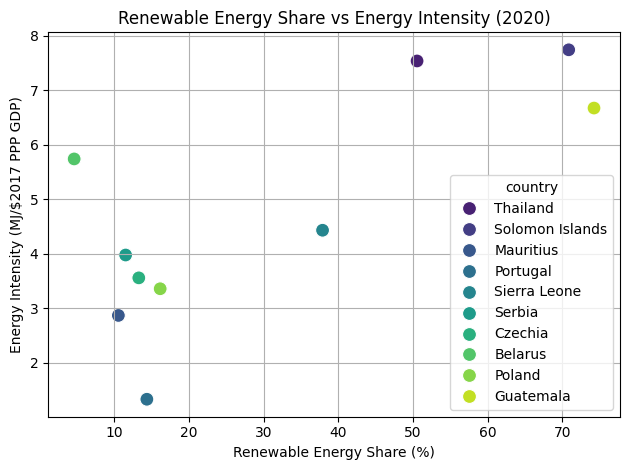

In [32]:
# filter data for the selected year
df_year = processed_df[processed_df['year'] == year]

# Calculate correlation between renewable energy share and energy intensity
correlation = df_year['renewable_energy_share'].corr(df_year['energy_intensity'])
print(f"Correlation between renewable energy share and energy intensity: {correlation:.2f}")

# filter 10 random countries
df_year = df_year.sample(n=10, random_state=42)

# Create a scatter plot for renewable energy share  vs energy intensity
plt.title(f'Renewable Energy Share vs Energy Intensity ({year})')
sns.scatterplot(
    data=df_year,
    x='renewable_energy_share',
    y='energy_intensity',
    hue='country',
    palette='viridis',
    s=100
)
plt.xlabel('Renewable Energy Share (%)')
plt.ylabel('Energy Intensity (MJ/$2017 PPP GDP)')
plt.grid(True)
plt.tight_layout()
plt.show()



**Interpretation of Hypothesis 3 (Global Data):**

Using all available countries in 2020, the correlation between renewable energy share and energy intensity is **positive but weak (0.29)**.

This contradicts the original hypothesis, which assumed that higher renewable share would correlate with lower energy intensity (greater efficiency). The data instead suggests that many countries with a strong renewable presence still consume relatively high energy per unit of GDP, likely due to structural or economic inefficiencies.

*Note:* The visualization is limited to 10 countries 

The hypothesis is **not supported** by global data.


### Hypothesis 4: Renewable capacity growth vs CO2 emissions growth

THis hypothesis investigates whether countries that have significantly increased their renewable electricity capacity per capita between 2000 and 2020 have alse experienced a decrease in CO2 emissions.



Correlation between renewable capacity growth and CO2 emissions growth: 0.00


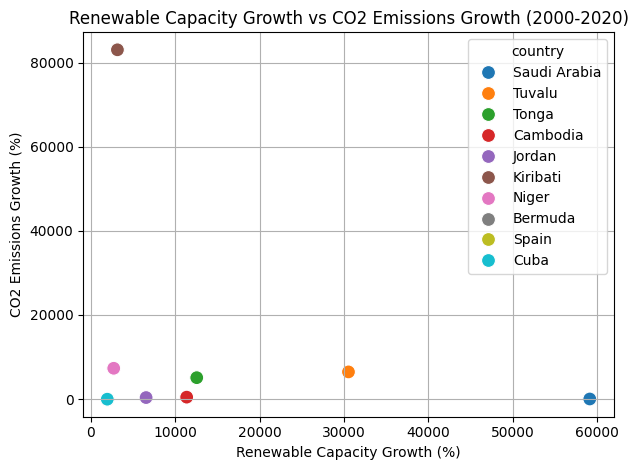

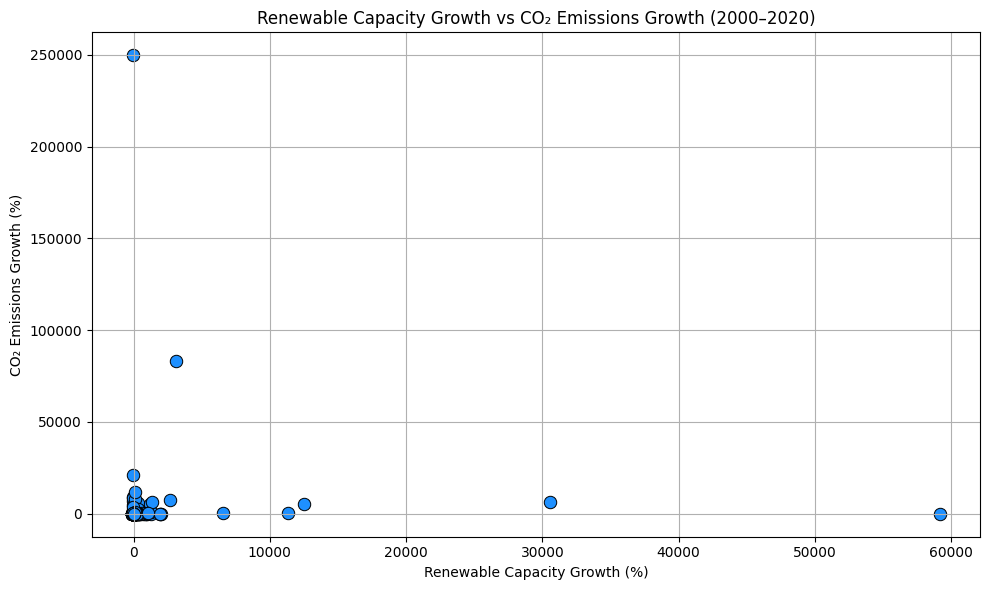

Correlation between renewable capacity growth and CO2 emissions growth: 0.00


In [33]:
# select initial and final years
initial_year = 2000
final_year = 2020

# filter data for initial and final years
df_start = processed_df[processed_df['year'] == initial_year]
df_end = processed_df[processed_df['year'] == final_year]




# Merge the two DataFrames on 'country'
df_merged = pd.merge(df_start[['country', 'renewable_capacity_per_capita', 'co2_emissions_kt']],
                     df_end[['country', 'renewable_capacity_per_capita', 'co2_emissions_kt']],
                     on='country', suffixes=('_start', '_end')
)

# There is a problem with the data, some countries have 0 renewable capacity per capita in the initial year and 
# this causes division by zero in the growth calculation. We will filter these out.
df_merged = df_merged[df_merged['renewable_capacity_per_capita_start'] > 0]

# calculate growth percentage
df_merged['renewable_capacity_growth'] = (
    df_merged['renewable_capacity_per_capita_end'] - df_merged['renewable_capacity_per_capita_start']
) / df_merged['renewable_capacity_per_capita_start'] * 100

df_merged['co2_emissions_growth'] = (
    df_merged['co2_emissions_kt_end'] - df_merged['co2_emissions_kt_start']
) / df_merged['co2_emissions_kt_start'] * 100

# Calculate correlation between renewable capacity growth and CO2 emissions growth
correlation = df_merged[['renewable_capacity_growth', 'co2_emissions_growth']].corr().iloc[0, 1]
print(f"Correlation between renewable capacity growth and CO2 emissions growth: {correlation:.2f}")

# select top 10 countries with highest growth in renewable capacity
top10 = df_merged.sort_values("renewable_capacity_growth", ascending=False).head(10)
sns.scatterplot(
    data=top10,
    x='renewable_capacity_growth',
    y='co2_emissions_growth',
    hue='country',
    s=100,
    palette='tab10'
)
plt.title('Renewable Capacity Growth vs CO2 Emissions Growth (2000-2020)')
plt.xlabel('Renewable Capacity Growth (%)')
plt.ylabel('CO2 Emissions Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a scatter plot for renewable capacity growth vs CO2 emissions growth
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged,
    x='renewable_capacity_growth',
    y='co2_emissions_growth',
    s=80,
    color='dodgerblue',
    edgecolor='black'
)
plt.title('Renewable Capacity Growth vs CO₂ Emissions Growth (2000–2020)')
plt.xlabel('Renewable Capacity Growth (%)')
plt.ylabel('CO₂ Emissions Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate correlation between renewable capacity growth and CO2 emissions growth
correlation = df_merged[['renewable_capacity_growth', 'co2_emissions_growth']].corr().iloc[0, 1]
print(f"Correlation between renewable capacity growth and CO2 emissions growth: {correlation:.2f}")

### Hypothesis 4: Renewable Growth vs CO₂ Emissions Reduction

This hypothesis proposed that countries increasing their renewable electricity capacity per capita would also reduce their CO₂ emissions over time.

However, analysis of data from 2000 to 2020 shows **no meaningful correlation** between these two variables (r = 0.00). Many countries that expanded renewable infrastructure also increased emissions, likely due to:

- Parallel expansion of fossil fuel energy,
- Industrial growth outpacing decarbonization,
- Or use of renewables without displacing carbon-intensive sources.

Therefore, the hypothesis is **not supported** by the global data. A renewable energy transition alone does not guarantee reduced emissions — broader systemic changes are needed.


### Predictive model

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
